In [32]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# from sklearn import cross_validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [33]:
dataset=pd.read_csv('input.csv')
dataset

,Year,APMAM,APSAB,APSLAKE,OPBPC,OPRC,OPSLAKE,BSAAM
0,1948,9.13,3.58,3.91,4.10,7.43,6.47,54235
1,1949,5.28,4.82,5.20,7.55,11.11,10.26,67567
2,1950,4.20,3.77,3.67,9.52,12.20,11.35,66161
3,1951,4.60,4.46,3.93,11.14,15.15,11.13,68094
4,1952,7.15,4.99,4.88,16.34,20.05,22.81,107080
5,1953,9.70,5.65,4.91,8.88,8.15,7.41,67594
6,1954,5.02,1.45,1.77,13.57,12.45,13.32,65356
7,1955,6.70,7.44,6.51,9.28,9.65,9.80,67909
8,1956,10.50,5.85,3.38,21.20,18.55,17.42,92715
9,1957,9.10,6.13,4.08,9.55,9.20,8.25,70024


In [34]:
dataset.isnull().any()

Year       False
APMAM      False
APSAB      False
APSLAKE    False
OPBPC      False
OPRC       False
OPSLAKE    False
BSAAM      False
dtype: bool

In [35]:
dataset=dataset.drop(['Year'],axis=1)
dataset

,APMAM,APSAB,APSLAKE,OPBPC,OPRC,OPSLAKE,BSAAM
0,9.13,3.58,3.91,4.10,7.43,6.47,54235
1,5.28,4.82,5.20,7.55,11.11,10.26,67567
2,4.20,3.77,3.67,9.52,12.20,11.35,66161
3,4.60,4.46,3.93,11.14,15.15,11.13,68094
4,7.15,4.99,4.88,16.34,20.05,22.81,107080
5,9.70,5.65,4.91,8.88,8.15,7.41,67594
6,5.02,1.45,1.77,13.57,12.45,13.32,65356
7,6.70,7.44,6.51,9.28,9.65,9.80,67909
8,10.50,5.85,3.38,21.20,18.55,17.42,92715
9,9.10,6.13,4.08,9.55,9.20,8.25,70024


In [36]:
print(dataset.shape)

(43, 7)


In [37]:
print(dataset.dtypes)

APMAM      float64
APSAB      float64
APSLAKE    float64
OPBPC      float64
OPRC       float64
OPSLAKE    float64
BSAAM        int64
dtype: object


In [38]:
print(dataset.head(10))

   APMAM  APSAB  APSLAKE  OPBPC   OPRC  OPSLAKE   BSAAM
0   9.13   3.58     3.91   4.10   7.43     6.47   54235
1   5.28   4.82     5.20   7.55  11.11    10.26   67567
2   4.20   3.77     3.67   9.52  12.20    11.35   66161
3   4.60   4.46     3.93  11.14  15.15    11.13   68094
4   7.15   4.99     4.88  16.34  20.05    22.81  107080
5   9.70   5.65     4.91   8.88   8.15     7.41   67594
6   5.02   1.45     1.77  13.57  12.45    13.32   65356
7   6.70   7.44     6.51   9.28   9.65     9.80   67909
8  10.50   5.85     3.38  21.20  18.55    17.42   92715
9   9.10   6.13     4.08   9.55   9.20     8.25   70024


In [39]:
pd.set_option('precision', 3)
print(dataset.describe())

        APMAM   APSAB  APSLAKE   OPBPC    OPRC  OPSLAKE       BSAAM
count  43.000  43.000   43.000  43.000  43.000   43.000      43.000
mean    7.323   4.652    4.930  12.836  12.002   13.522   77756.047
std     3.098   2.052    2.258   7.688   5.028    6.382   25518.909
min     2.700   1.450    1.770   4.050   4.350    4.600   41785.000
25%     4.975   3.390    3.360   7.975   7.875    8.705   59857.000
50%     7.080   4.460    4.620   9.550  11.110   12.140   69177.000
75%     9.115   5.685    5.830  16.545  14.975   16.920   92205.500
max    18.080  11.960   13.020  43.370  24.850   33.070  146345.000


In [40]:
print(dataset.corr())

         APMAM  APSAB  APSLAKE  OPBPC   OPRC  OPSLAKE  BSAAM
APMAM    1.000  0.828    0.816  0.122  0.154    0.108  0.239
APSAB    0.828  1.000    0.900  0.040  0.106    0.030  0.183
APSLAKE  0.816  0.900    1.000  0.093  0.106    0.101  0.249
OPBPC    0.122  0.040    0.093  1.000  0.865    0.943  0.886
OPRC     0.154  0.106    0.106  0.865  1.000    0.919  0.920
OPSLAKE  0.108  0.030    0.101  0.943  0.919    1.000  0.938
BSAAM    0.239  0.183    0.249  0.886  0.920    0.938  1.000


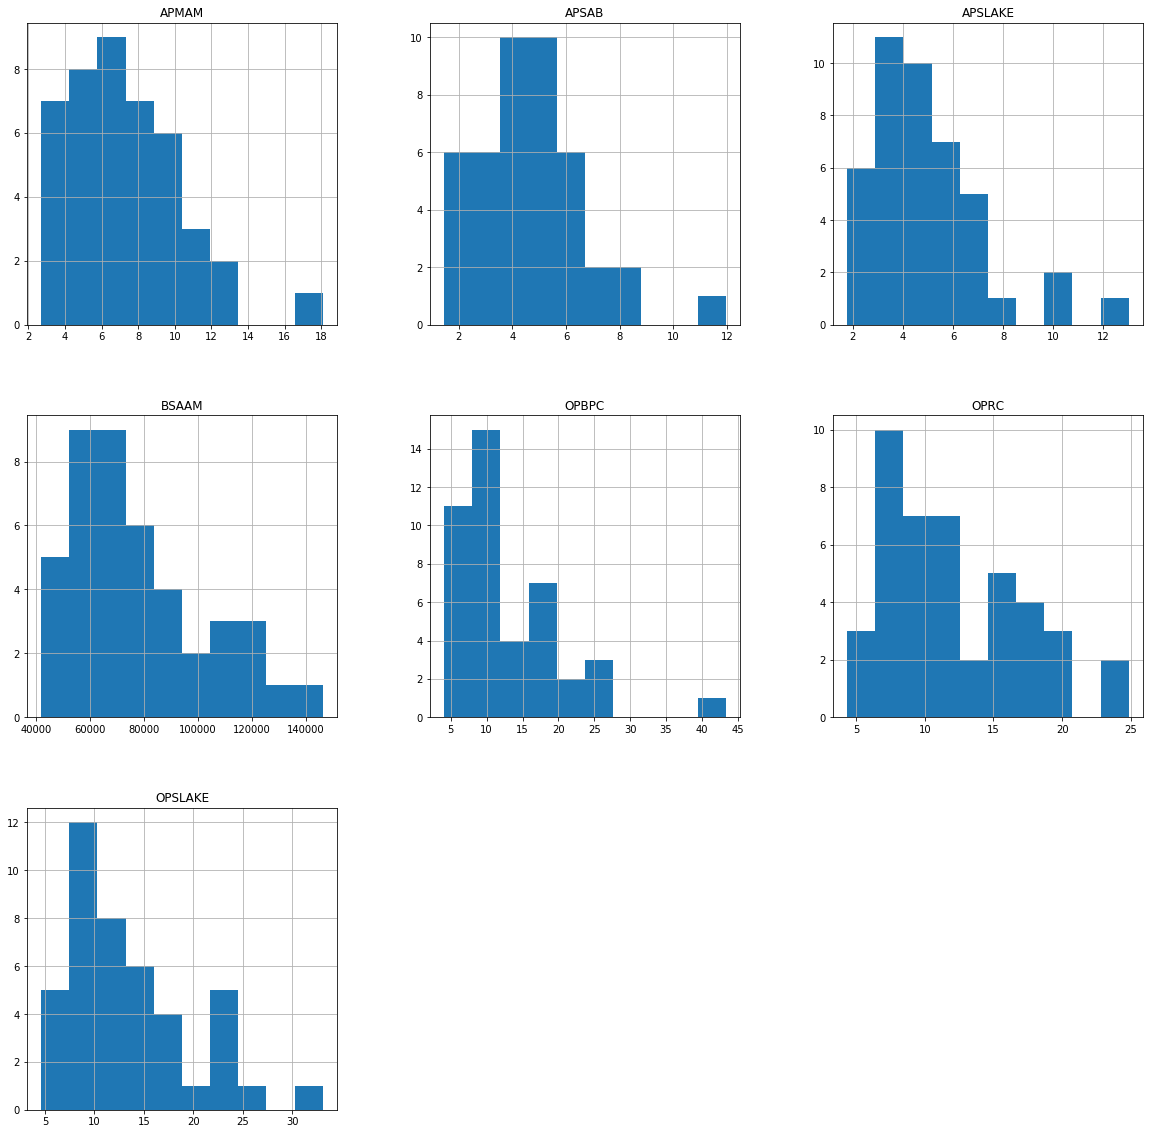

In [41]:
dataset.hist(figsize=(20,20))
plt.show()

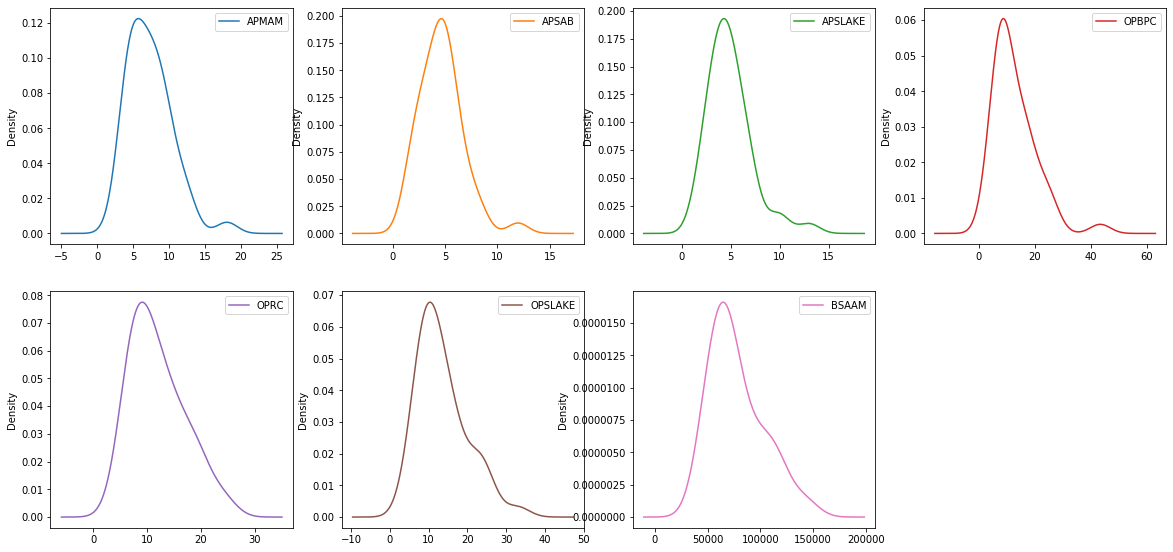

In [42]:
dataset.plot(kind='density', subplots=True,figsize=(20,20), layout=(4,4), sharex=False)
plt.show()

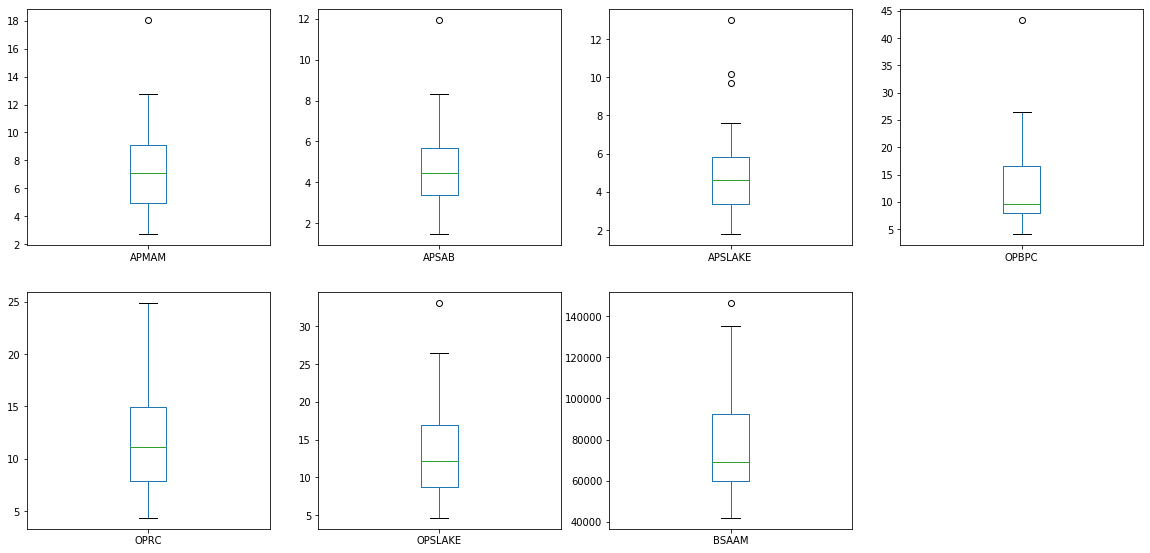

In [43]:
dataset.plot(kind='box', subplots=True,figsize=(20,20), layout=(4,4), sharex=False, sharey=False)
plt.show()


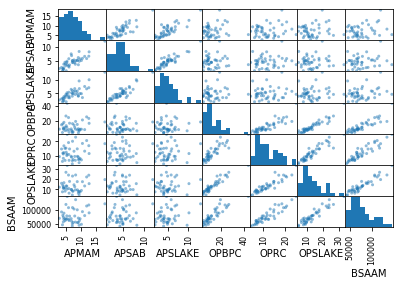

In [44]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

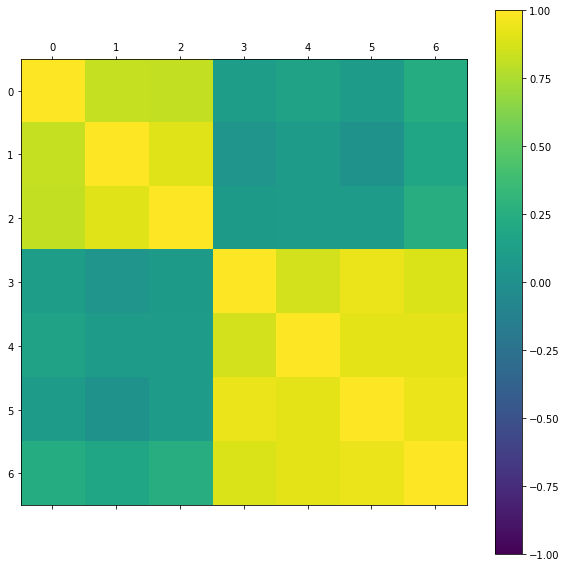

In [45]:
names = ['APMAM','APSAB','APSLAKE','OPBPC','OPRC','OPSLAKE','BSAAM']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(),cmap='viridis', vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,7,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

plt.show()

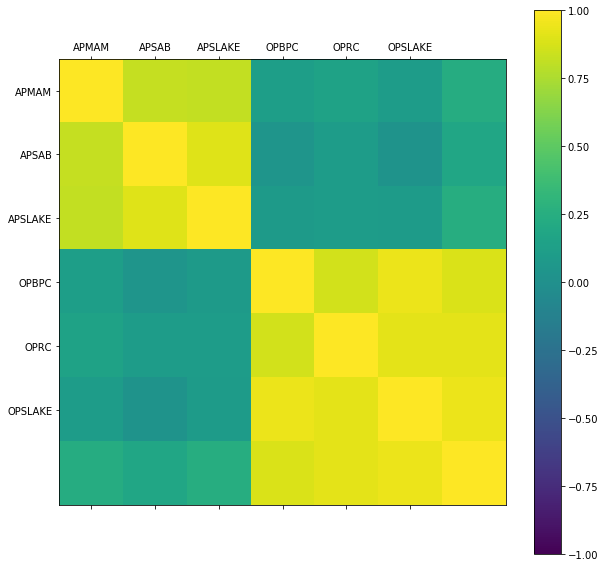

In [46]:
# correlation matrix
names = ['APMAM','APSAB','APSLAKE','OPBPC','OPRC','OPSLAKE','BSAAM']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

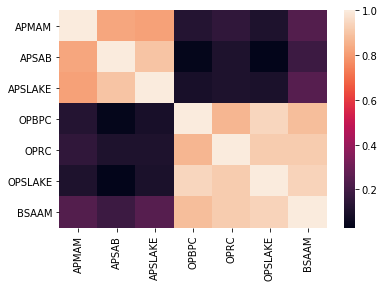

In [47]:
import seaborn as sns
sns.heatmap(dataset.corr())
plt.show()

In [48]:
# Prepare Data

# Split-out validation dataset
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [49]:
validation_size = 0.20
seed = 5
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [50]:
X

,APMAM,APSAB,APSLAKE,OPBPC,OPRC,OPSLAKE
0,9.13,3.58,3.91,4.10,7.43,6.47
1,5.28,4.82,5.20,7.55,11.11,10.26
2,4.20,3.77,3.67,9.52,12.20,11.35
3,4.60,4.46,3.93,11.14,15.15,11.13
4,7.15,4.99,4.88,16.34,20.05,22.81
5,9.70,5.65,4.91,8.88,8.15,7.41
6,5.02,1.45,1.77,13.57,12.45,13.32
7,6.70,7.44,6.51,9.28,9.65,9.80
8,10.50,5.85,3.38,21.20,18.55,17.42
9,9.10,6.13,4.08,9.55,9.20,8.25


In [51]:
X_train

,APMAM,APSAB,APSLAKE,OPBPC,OPRC,OPSLAKE
5,9.70,5.65,4.91,8.88,8.15,7.41
0,9.13,3.58,3.91,4.10,7.43,6.47
42,7.10,5.06,6.05,5.80,6.50,8.41
2,4.20,3.77,3.67,9.52,12.20,11.35
22,4.05,1.98,2.94,8.95,11.25,11.00
41,8.80,5.06,4.92,8.05,9.60,9.58
26,4.25,2.54,2.36,18.05,16.90,16.42
19,12.65,6.62,7.14,23.25,17.00,23.66
10,8.75,5.23,5.90,15.25,14.80,17.48
40,6.83,6.82,5.18,7.20,9.01,9.88


In [52]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'r2'

In [53]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [54]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.627803 (0.463808)
LASSO: 0.627913 (0.463662)
EN: 0.679233 (0.354555)
KNN: 0.541573 (0.326741)
CART: 0.155643 (0.564390)
SVR: -1.871092 (1.858128)


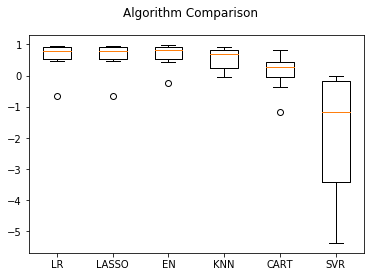

In [55]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [56]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.627803 (0.463808)
ScaledLASSO: 0.628088 (0.463376)
ScaledEN: 0.714846 (0.254851)
ScaledKNN: 0.292454 (0.675619)
ScaledCART: 0.041338 (0.624888)
ScaledSVR: -1.870134 (1.857421)


In [57]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.379742 using {'n_neighbors': 1}


In [58]:
# for params, mean_score, scores in grid_result.grid_scores_:
# print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))
    
for means,stdev,neighbors in zip(grid_result.cv_results_['mean_test_score'],grid_result.cv_results_['std_test_score'],grid_result.cv_results_['params']):
    print(round(means, 6),round(stdev,6),neighbors)  

0.379742 0.564721 {'n_neighbors': 1}
0.23994 0.590321 {'n_neighbors': 3}
0.326589 0.64717 {'n_neighbors': 5}
0.30598 0.627324 {'n_neighbors': 7}
0.341657 0.547258 {'n_neighbors': 9}
0.315651 0.636352 {'n_neighbors': 11}
0.188056 0.678722 {'n_neighbors': 13}
-0.014151 0.787033 {'n_neighbors': 15}
-0.106585 0.798868 {'n_neighbors': 17}
-0.20177 0.838088 {'n_neighbors': 19}
-0.361574 0.902717 {'n_neighbors': 21}


In [60]:
import sklearn.metrics as metrics
model = KNeighborsRegressor(n_neighbors= 3)
model.fit(rescaledX, Y_train)
predictions=model.predict(rescaledX)
print(metrics.r2_score(Y_train, predictions))
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(metrics.r2_score(Y_validation, predictions))



0.8861380548313734
0.6948839904944191


In [61]:
from sklearn import metrics
model = LinearRegression()
model.fit(rescaledX, Y_train)
predictions=model.predict(rescaledX)
print(metrics.r2_score(Y_train, predictions))


0.9294819080342184


In [62]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(metrics.r2_score(Y_validation, predictions))


0.8369703020617937


In [63]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


n_samples, n_features = 10, 5
np.random.seed(0)
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(rescaledX, Y_train)
clf.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}

In [64]:
model = SVR(C= 10, epsilon= 0.1, gamma= 1e-07, kernel= 'linear')
model.fit(rescaledX, Y_train)
predictions=model.predict(rescaledX)
print(metrics.r2_score(Y_train, predictions))


-0.026420833789032816


In [65]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(metrics.r2_score(Y_validation, predictions))



0.02394109974543912


In [66]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))


In [67]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: 0.537798 (0.277413)
ScaledGBM: 0.459113 (0.523540)
ScaledRF: 0.441296 (0.481664)
ScaledET: 0.609496 (0.306617)


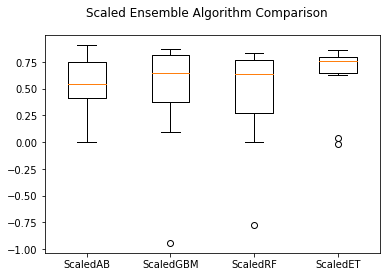

In [68]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [69]:
classifier = RandomForestRegressor()

param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }




In [70]:
from sklearn.model_selection import GridSearchCV

gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=param_grid,
                     scoring='mean_squared_error',
                     cv=5,
                     n_jobs=-1)

grid = GridSearchCV(classifier, param_grid, n_jobs=-1, cv=5)

grid.fit(X_train, Y_train)

print(grid.best_score_ )
print(grid.best_params_)



0.7949016408032631
{'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10}


In [71]:
model = RandomForestRegressor(bootstrap=True, max_features='auto', min_samples_split=2, n_estimators= 30)
model.fit(rescaledX, Y_train)
model.feature_importances_

predictions=model.predict(rescaledX)
print(metrics.r2_score(Y_train, predictions))
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(metrics.r2_score(Y_validation, predictions))



0.972163002483572
0.8450693447764761


In [72]:
feature_columns=['APMAM','APSAB','APSLAKE','OPBPC','OPRC','OPSLAKE']
feature_columns

['APMAM', 'APSAB', 'APSLAKE', 'OPBPC', 'OPRC', 'OPSLAKE']

In [73]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = feature_columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances 



,importance
OPSLAKE,0.511
OPRC,0.236
OPBPC,0.225
APSAB,0.015
APSLAKE,0.007
APMAM,0.007


In [74]:
#dataset

In [75]:
cols = [col for col in dataset .columns if col in ['OPBPC','OPRC','OPSLAKE','APSLAKE']]
datset1 = dataset[cols]
y = dataset.iloc[:, 6]

X_train, X_validation, Y_train, Y_validation = train_test_split(datset1, y ,test_size=0.2, random_state=5)
X_validation

,APSLAKE,OPBPC,OPRC,OPSLAKE
28,9.70,6.80,5.25,4.73
23,5.42,8.45,10.90,10.82
25,2.88,14.80,14.70,15.86
3,3.93,11.14,15.15,11.13
24,6.79,7.90,7.60,8.06
6,1.77,13.57,12.45,13.32
4,4.88,16.34,20.05,22.81
37,4.04,11.45,10.16,13.06
29,3.90,4.05,4.35,4.60


In [76]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)


model = LinearRegression()
model.fit(rescaledX, Y_train)
predictions=model.predict(rescaledX)
print(metrics.r2_score(Y_train, predictions))

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(metrics.r2_score(Y_validation, predictions))



0.9269831270039803
0.8717232916195591


In [77]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)


In [78]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.422974 using {'n_estimators': 50}


In [79]:
for means,stdev,neighbors in zip(grid_result.cv_results_['mean_test_score'],grid_result.cv_results_['std_test_score'],grid_result.cv_results_['params']):
    print(round(means, 6),round(stdev,6),neighbors)       

0.422974 0.5935 {'n_estimators': 50}
0.415068 0.647975 {'n_estimators': 100}
0.413635 0.652995 {'n_estimators': 150}
0.41319 0.654621 {'n_estimators': 200}
0.413056 0.654942 {'n_estimators': 250}
0.413047 0.655017 {'n_estimators': 300}
0.41305 0.655024 {'n_estimators': 350}
0.413051 0.655025 {'n_estimators': 400}


In [80]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto', random_state=7,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [81]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(metrics.r2_score(Y_validation, predictions))

0.8437972240215745
